In [133]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [1042]:
air=pd.read_csv(r'C:\Users\HP\Downloads\ML Project - Decision Tree Airline Customer Satisfaction U16955468980 - Copy.csv')

In [1044]:
air.head()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [136]:
air.describe()

,Unnamed: 0.1,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,...,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,...,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [137]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       10000 non-null  int64  
 1   Unnamed: 0                         10000 non-null  int64  
 2   id                                 10000 non-null  int64  
 3   Gender                             10000 non-null  object 
 4   Customer Type                      10000 non-null  object 
 5   Age                                10000 non-null  int64  
 6   Type of Travel                     10000 non-null  object 
 7   Class                              10000 non-null  object 
 8   Flight Distance                    10000 non-null  int64  
 9   Inflight wifi service              10000 non-null  int64  
 10  Departure/Arrival time convenient  10000 non-null  int64  
 11  Ease of Online booking             10000 non-null  int6

In [138]:
air.isnull().sum()

Unnamed: 0.1                          0
Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26


In [139]:
(air.isnull().mean())*100

Unnamed: 0.1                         0.00
Unnamed: 0                           0.00
id                                   0.00
Gender                               0.00
Customer Type                        0.00
Age                                  0.00
Type of Travel                       0.00
Class                                0.00
Flight Distance                      0.00
Inflight wifi service                0.00
Departure/Arrival time convenient    0.00
Ease of Online booking               0.00
Gate location                        0.00
Food and drink                       0.00
Online boarding                      0.00
Seat comfort                         0.00
Inflight entertainment               0.00
On-board service                     0.00
Leg room service                     0.00
Baggage handling                     0.00
Checkin service                      0.00
Inflight service                     0.00
Cleanliness                          0.00
Departure Delay in Minutes        

In [140]:
air.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

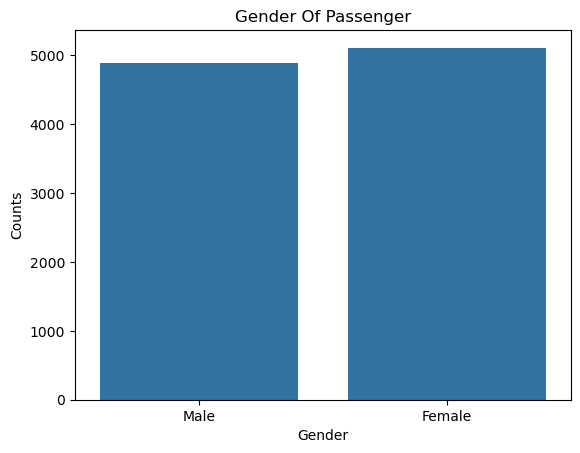

In [141]:
#check how many passenger of male and female
sns.countplot(data=air,x="Gender")
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Gender Of Passenger")
plt.show()

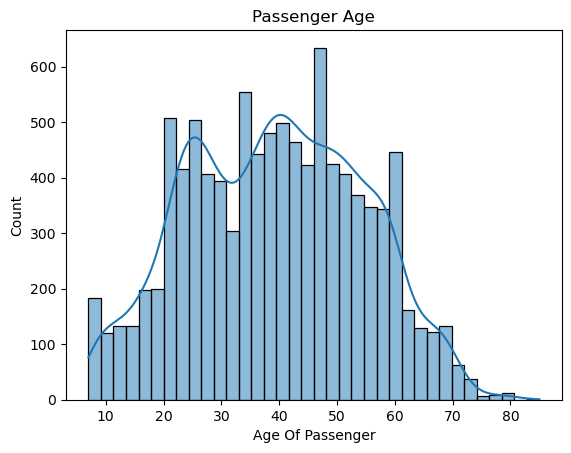

In [142]:
sns.histplot(data=air,x="Age",kde=True)
plt.xlabel("Age Of Passenger")
plt.title("Passenger Age")
plt.show()

In [143]:
air["Type of Travel"].value_counts()

Type of Travel
Business travel    6943
Personal Travel    3057
Name: count, dtype: int64

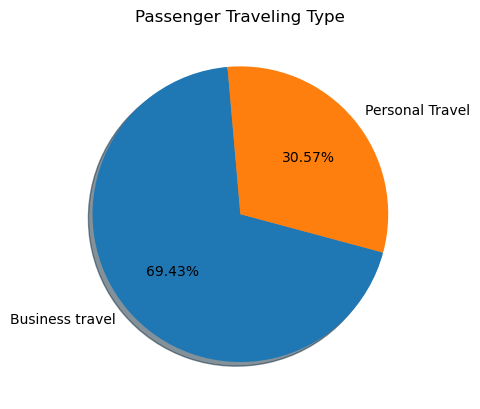

In [144]:
size=[6943,3057]
lables=["Business travel","Personal Travel"]
plt.pie(x=size,labels=lables,autopct="%0.2f%%",startangle=95,shadow=True)
plt.title("Passenger Traveling Type")
plt.show()

In [145]:
air["Customer Type"].value_counts()

Customer Type
Loyal Customer       8205
disloyal Customer    1795
Name: count, dtype: int64

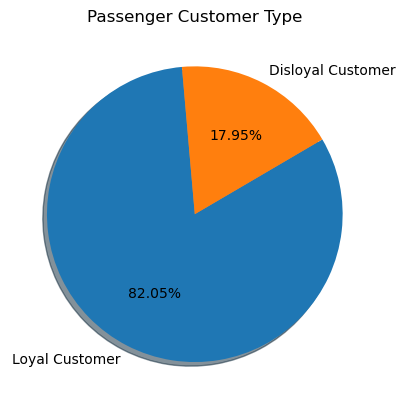

In [146]:
size=[8205,1795]
lables=["Loyal Customer","Disloyal Customer"]
plt.pie(x=size,labels=lables,autopct="%0.2f%%",startangle=95,shadow=True)
plt.title("Passenger Customer Type")
plt.show()

In [147]:
air["Class"].value_counts()

Class
Business    4832
Eco         4446
Eco Plus     722
Name: count, dtype: int64

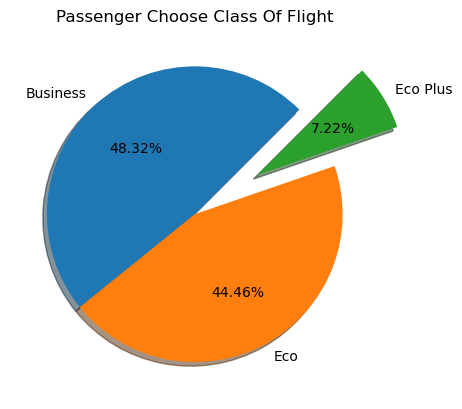

In [520]:
size=[4832,4446,722]
lables=["Business","Eco","Eco Plus"]
plt.pie(x=size,labels=lables,autopct="%0.2f%%",startangle=45,shadow=True,explode=[0,0,0.5])
plt.title("Passenger Choose Class Of Flight")
plt.show()

In [186]:
(air["Flight Distance"].value_counts().sort_index())

Flight Distance
31       1
67      15
73       5
74       3
77       4
        ..
3996     1
4000     1
4243     2
4963     1
4983     1
Name: count, Length: 2431, dtype: int64

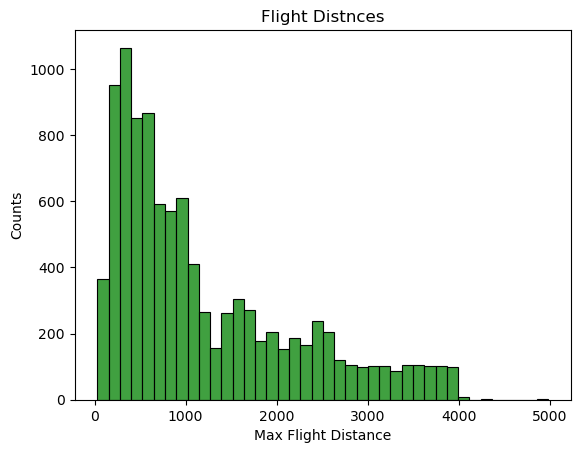

In [207]:
sns.histplot(data=air,x="Flight Distance",color="g")
plt.xlabel("Max Flight Distance")
plt.ylabel("Counts")
plt.title("Flight Distnces")
plt.show()

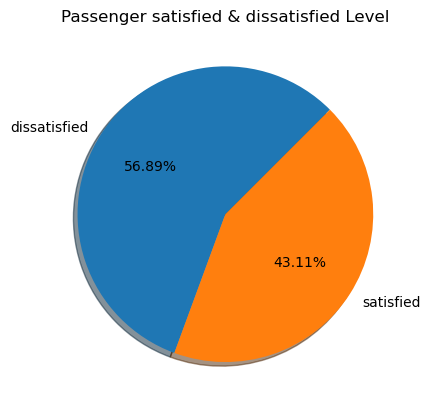

In [242]:
size=[5689,4311]
lables=["dissatisfied","satisfied"]
plt.pie(x=size,labels=lables,autopct="%0.2f%%",startangle=45,shadow=True)
plt.title("Passenger satisfied & dissatisfied Level")
plt.show()

In [258]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       10000 non-null  int64  
 1   Unnamed: 0                         10000 non-null  int64  
 2   id                                 10000 non-null  int64  
 3   Gender                             10000 non-null  object 
 4   Customer Type                      10000 non-null  object 
 5   Age                                10000 non-null  int64  
 6   Type of Travel                     10000 non-null  object 
 7   Class                              10000 non-null  object 
 8   Flight Distance                    10000 non-null  int64  
 9   Inflight wifi service              10000 non-null  int64  
 10  Departure/Arrival time convenient  10000 non-null  int64  
 11  Ease of Online booking             10000 non-null  int6

In [248]:
air["Inflight wifi service"].value_counts()

Inflight wifi service
2    2526
3    2438
4    1923
1    1712
5    1109
0     292
Name: count, dtype: int64

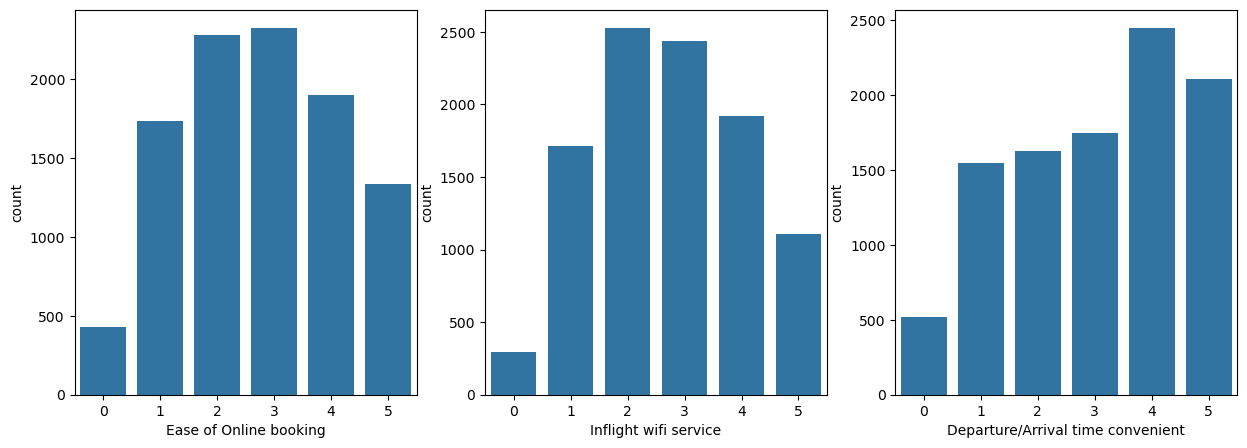

In [286]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
sns.countplot(data=air,x="Ease of Online booking")

plt.subplot(1,3,2)
sns.countplot(data=air,x="Inflight wifi service")

plt.subplot(1,3,3)
sns.countplot(data=air,x="Departure/Arrival time convenient")

plt.show()

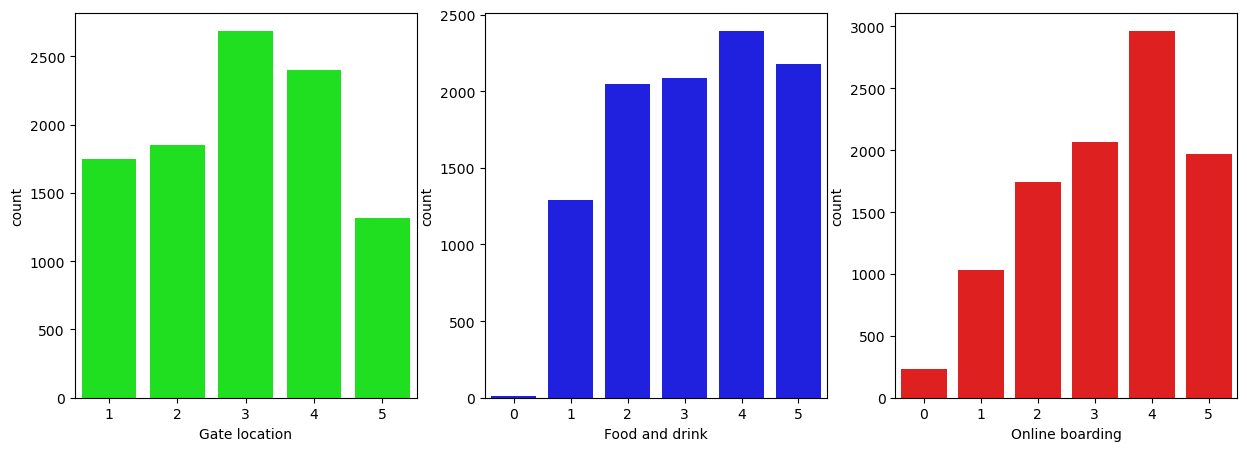

In [316]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
sns.countplot(data=air,x="Gate location",color="#00FF00")

plt.subplot(1,3,2)
sns.countplot(data=air,x="Food and drink",color="#0000FF")

plt.subplot(1,3,3)
sns.countplot(data=air,x="Online boarding",color="#FF0000")

plt.show()

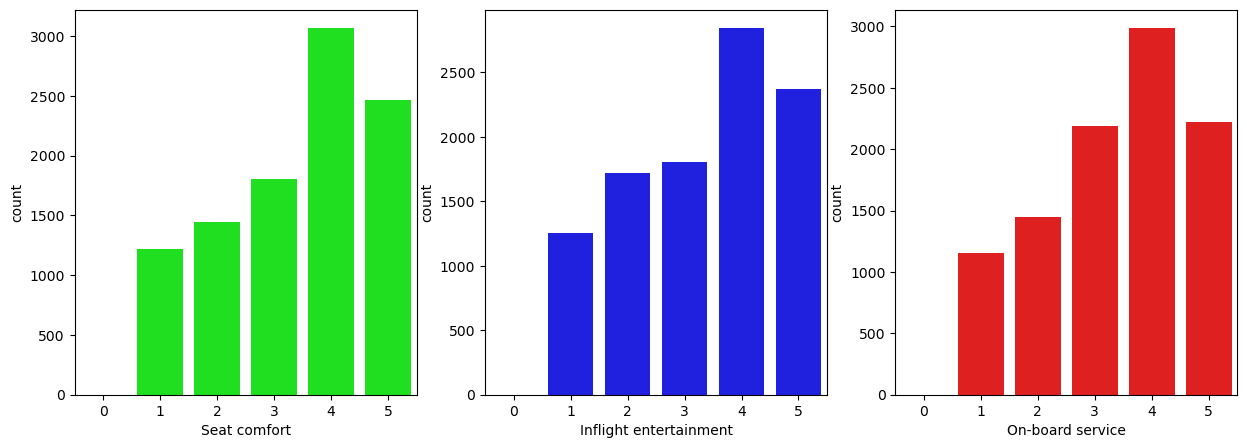

In [327]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
sns.countplot(data=air,x="Seat comfort",color="#00FF00")

plt.subplot(1,3,2)
sns.countplot(data=air,x="Inflight entertainment",color="#0000FF")

plt.subplot(1,3,3)
sns.countplot(data=air,x="On-board service",color="#FF0000")

plt.show()

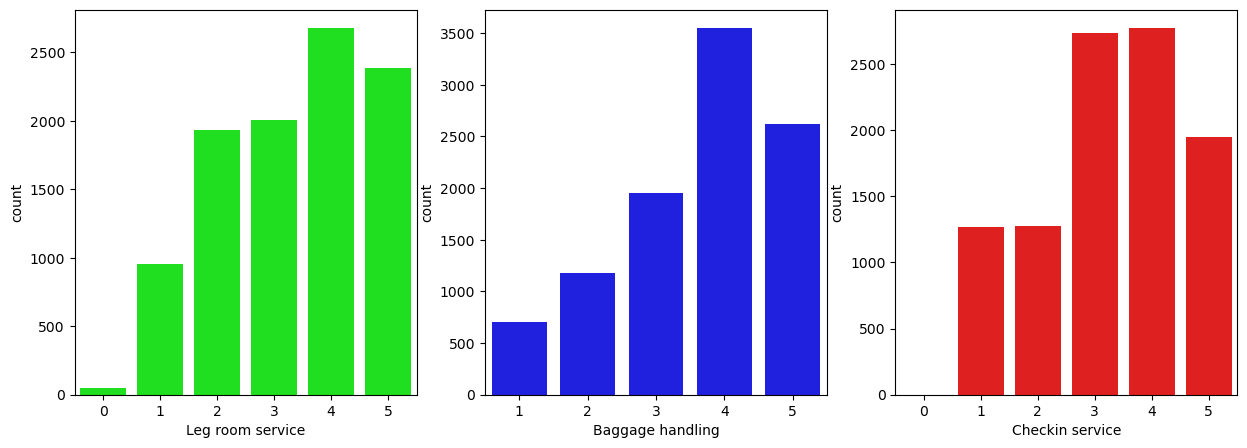

In [329]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
sns.countplot(data=air,x="Leg room service",color="#00FF00")

plt.subplot(1,3,2)
sns.countplot(data=air,x="Baggage handling",color="#0000FF")

plt.subplot(1,3,3)
sns.countplot(data=air,x="Checkin service",color="#FF0000")

plt.show()

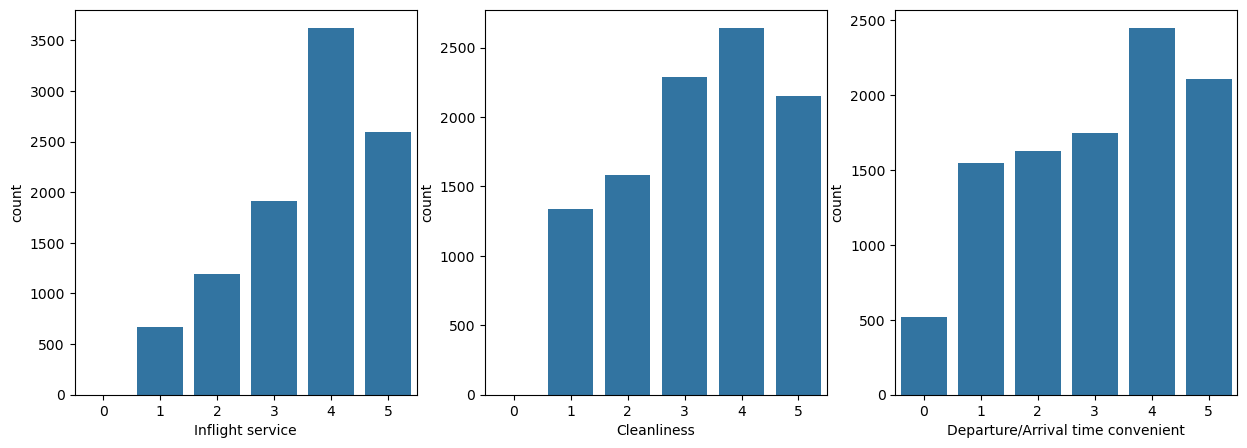

In [298]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
sns.countplot(data=air,x="Inflight service")

plt.subplot(1,3,2)
sns.countplot(data=air,x="Cleanliness")

plt.subplot(1,3,3)
sns.countplot(data=air,x="Departure/Arrival time convenient")

plt.show()

In [349]:
air.groupby("Class")["Departure Delay in Minutes"].mean()

Class
Business    14.892177
Eco         14.899010
Eco Plus    13.371191
Name: Departure Delay in Minutes, dtype: float64

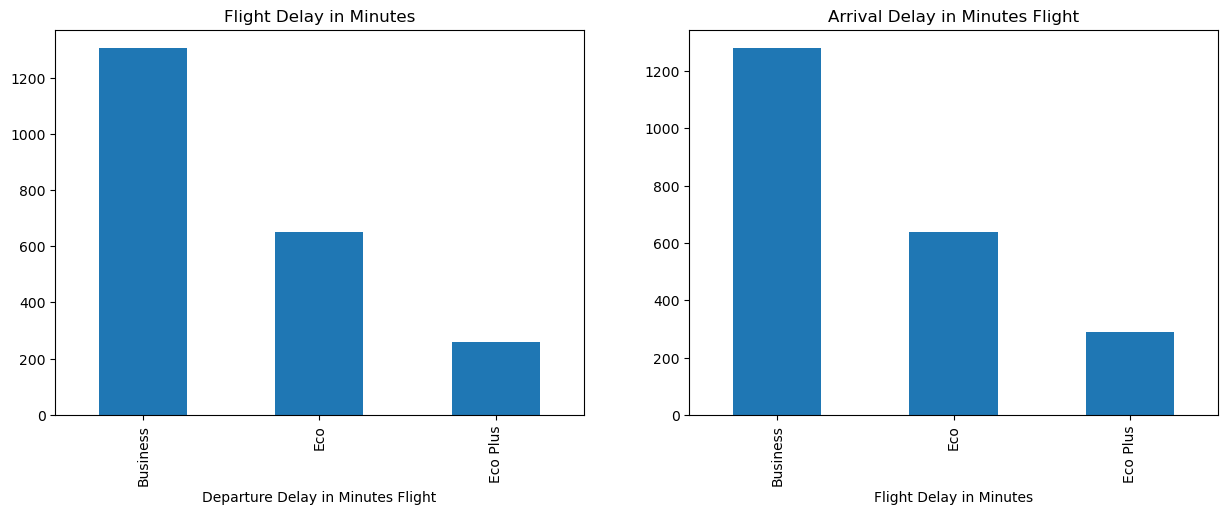

In [369]:
#max time business class flight are delay and arrival delay

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
air.groupby("Class")["Departure Delay in Minutes"].max().plot(kind="bar")
plt.xlabel("Departure Delay in Minutes Flight")
plt.title("Flight Delay in Minutes")


plt.subplot(1,2,2)
air.groupby("Class")["Arrival Delay in Minutes"].max().plot(kind="bar")
plt.xlabel("Flight Delay in Minutes")
plt.title("Arrival Delay in Minutes Flight")

plt.show()

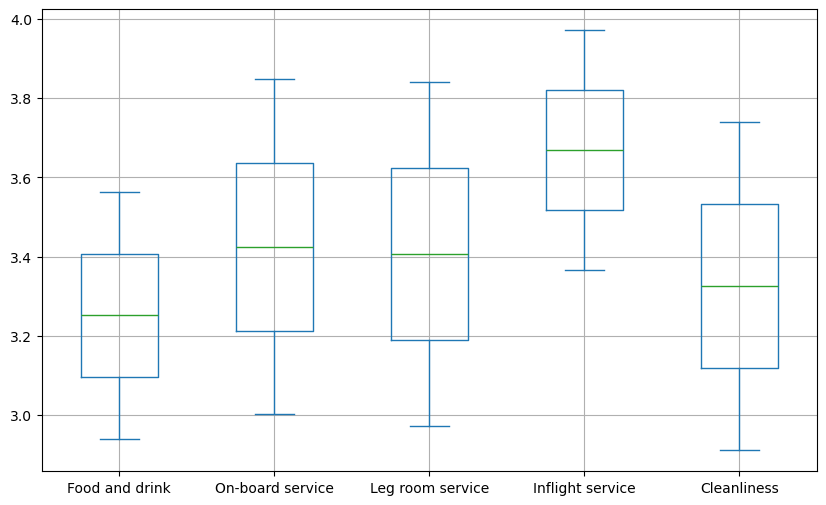

In [518]:
#satisfaction level with Food and drink,On-board service,Inflight service,Cleanliness
air.groupby("satisfaction")[["Food and drink","On-board service","Leg room service","Inflight service","Cleanliness"]].mean().plot(kind="box",figsize=(10, 6),grid=True)
plt.show()

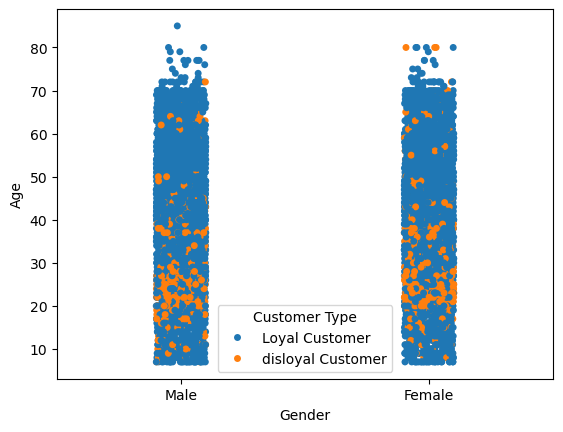

In [516]:
# Meal more Loyal Customer compered to Female
sns.stripplot(data=air,x="Gender",y="Age",hue="Customer Type")
plt.show()

In [ ]:
#drop unusefull columns

air.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1,inplace=True)

air.drop("id",axis=1,inplace=True)

In [1050]:
air

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Male,Loyal Customer,50,Business travel,Business,3599,3,3,3,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,Male,Loyal Customer,38,Business travel,Business,3873,5,5,5,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,Female,Loyal Customer,39,Business travel,Business,319,4,4,4,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,Male,Loyal Customer,52,Business travel,Business,1363,5,5,5,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [ ]:
#feature encoding
air["Gender"]=air["Gender"].replace({"Female":0,"Male":1})

air["Customer Type"]=air["Customer Type"].replace({"Loyal Customer":0,"disloyal Customer":1})

air["Type of Travel"]=air["Type of Travel"].replace({"Business travel":0,"Personal Travel":1})

In [1068]:
air.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,25,0,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,61,0,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# one hot encoding 

In [2261]:
# one hot encoding 
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(drop="first",sparse_output=False,dtype=np.int32)

new_air=ohe.fit_transform(air[["Class"]])

class_new=pd.DataFrame(new_air,columns=ohe.get_feature_names_out(['Class']))

air1=pd.concat([air,encoding_new],axis=1)

In [2263]:
air1

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,1,0,13,1,Eco Plus,460,3,4,3,1,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,0,1
1,1,1,25,0,Business,235,3,2,3,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,0,0
2,0,0,26,0,Business,1142,2,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,0,0
3,0,0,25,0,Business,562,2,5,5,5,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0
4,1,0,61,0,Business,214,3,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,50,0,Business,3599,3,3,3,3,...,5,5,5,5,4,12,24.0,satisfied,0,0
9996,1,0,38,0,Business,3873,5,5,5,5,...,4,4,3,4,5,0,0.0,satisfied,0,0
9997,0,0,39,0,Business,319,4,4,4,4,...,4,4,3,4,2,0,0.0,satisfied,0,0
9998,1,0,52,0,Business,1363,5,5,5,5,...,3,4,5,4,5,1,11.0,satisfied,0,0


# labelencoder

In [ ]:
#labelencoder 
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

new_s=le.fit_transform(air1[["satisfaction"]])

new_v=pd.DataFrame(new_s,columns=['satisfaction_c'])

air_last=pd.concat([air1,new_v],axis=1)

In [1104]:
air_last

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus,satisfaction_c
0,1,0,13,1,Eco Plus,460,3,4,3,1,...,4,4,5,5,25,18.0,neutral or dissatisfied,0,1,0
1,1,1,25,0,Business,235,3,2,3,3,...,3,1,4,1,1,6.0,neutral or dissatisfied,0,0,0
2,0,0,26,0,Business,1142,2,2,2,2,...,4,4,4,5,0,0.0,satisfied,0,0,1
3,0,0,25,0,Business,562,2,5,5,5,...,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0
4,1,0,61,0,Business,214,3,3,3,3,...,4,3,3,3,0,0.0,satisfied,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,50,0,Business,3599,3,3,3,3,...,5,5,5,4,12,24.0,satisfied,0,0,1
9996,1,0,38,0,Business,3873,5,5,5,5,...,4,3,4,5,0,0.0,satisfied,0,0,1
9997,0,0,39,0,Business,319,4,4,4,4,...,4,3,4,2,0,0.0,satisfied,0,0,1
9998,1,0,52,0,Business,1363,5,5,5,5,...,4,5,4,5,1,11.0,satisfied,0,0,1


In [1122]:
#dro unused columns
air_last.drop(["Class","satisfaction"],axis=1,inplace=True)

In [2259]:

air_last

,Gender,Customer_Type,Age,Type_of_Travel,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Class_Eco,Class_Eco Plus,satisfaction_c
0,1,0,13,1,460,3,4,3,1,5,...,3,4,4,5,5,25,18,0,1,0
1,1,1,25,0,235,3,2,3,3,1,...,5,3,1,4,1,1,6,0,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,3,4,4,4,5,0,0,0,0,1
3,0,0,25,0,562,2,5,5,5,2,...,5,3,1,4,2,11,9,0,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,4,3,3,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,50,0,3599,3,3,3,3,4,...,5,5,5,5,4,12,24,0,0,1
9996,1,0,38,0,3873,5,5,5,5,5,...,4,4,3,4,5,0,0,0,0,1
9997,0,0,39,0,319,4,4,4,4,5,...,4,4,3,4,2,0,0,0,0,1
9998,1,0,52,0,1363,5,5,5,5,2,...,3,4,5,4,5,1,11,0,0,1


In [1331]:
air_last.rename(columns={'Arrival Delay in Minutes': 'Arrival_Delay_in_Minutes'}, inplace=True)


In [1388]:
# convert data type object to int
air_last['Arrival_Delay_in_Minutes'] = pd.to_numeric(air_last['Arrival_Delay_in_Minutes'], errors='coerce').astype('Int64')


In [ ]:
# fill null vallue
air_last['Arrival_Delay_in_Minutes']=air_last['Arrival_Delay_in_Minutes'].fillna(air_last['Arrival_Delay_in_Minutes'].median())

air_last['Arrival_Delay_in_Minutes'].isnull().sum()

# Spliting 

In [2043]:
x=air_last.drop("satisfaction_c",axis=1)

In [2045]:
y=air_last["satisfaction_c"]

In [2049]:
from sklearn.model_selection import train_test_split

In [2051]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [2125]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold

k=KFold(n_splits=5)

model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]



In [2127]:
for i in model:
    print(i)
    print(cross_val_score(i,x_train,y_train,cv=k).mean())

LogisticRegression()
0.8082499999999999
DecisionTreeClassifier()
0.9145
SVC()
0.653125
RandomForestClassifier()
0.9411250000000001
KNeighborsClassifier()
0.659


#   DecisionTreeClassifier

In [2060]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2102]:
d=DecisionTreeClassifier(max_depth=8000, max_features=20, min_samples_split=150)

In [2104]:
d.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8000, max_features=20, min_samples_split=150)

In [ ]:
d.predict(x.loc[[26]])

air.loc[[26]]

In [ ]:
d.score(x_train,y_train)

d.score(x_test,y_test)

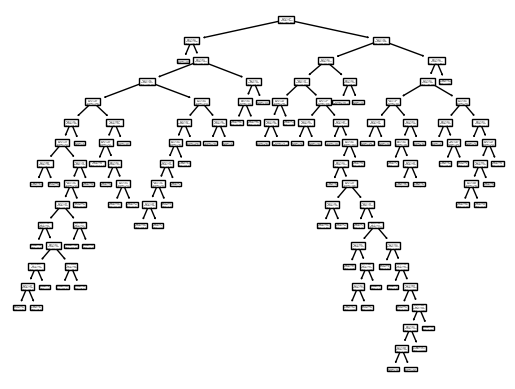

In [2110]:

plot_tree(d)
plt.show()

# hypertuning parameter

In [2112]:
from sklearn.model_selection import RandomizedSearchCV

In [2113]:
dic={"max_depth":[3000,4000,5000,6000,8000,9000],
     "min_samples_split":[150,200,250,300,350,400],
     "max_features":[24,22,20,15,10,5]
}

In [2115]:
r = RandomizedSearchCV(d,param_distributions=dic,n_iter=25,cv=k)

In [2116]:
r.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(max_depth=8000,
                                                    max_features=20,
                                                    min_samples_split=150),
                   n_iter=25,
                   param_distributions={'max_depth': [3000, 4000, 5000, 6000,
                                                      8000, 9000],
                                        'max_features': [24, 22, 20, 15, 10, 5],
                                        'min_samples_split': [150, 200, 250,
                                                              300, 350, 400]})

In [2117]:
r.best_estimator_

DecisionTreeClassifier(max_depth=5000, max_features=22, min_samples_split=150)

# metrics

In [2129]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score

In [ ]:
accuracy_score(y_train,d.predict(x_train))

accuracy_score(y_test,d.predict(x_test))

<Axes: >

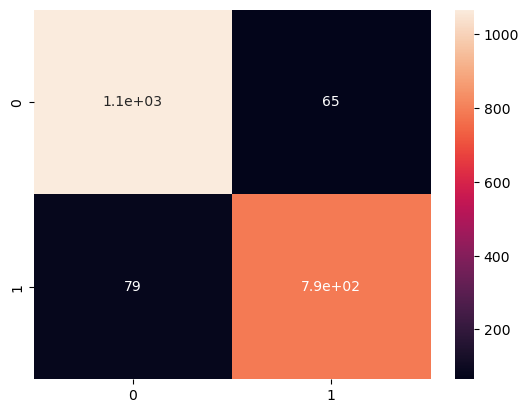

In [2273]:
confusion_matrix(y_test,d.predict(x_test))

sns.heatmap(confusion_matrix(y_test,d.predict(x_test)),annot=True)

In [2143]:
print(classification_report(y_test,d.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1132
           1       0.92      0.91      0.92       868

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
recall_score(y_test,d.predict(x_test))

recall_score(y_train,d.predict(x_train))

#  RandomForestClassifier

In [2193]:
from sklearn.ensemble import RandomForestClassifier

In [2242]:
rc=RandomForestClassifier(bootstrap=False, max_depth=5000, max_features=15,
                       min_samples_split=150, n_estimators=50)

In [2244]:
rc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=5000, max_features=15,
                       min_samples_split=150, n_estimators=50)

In [ ]:
rc.score(x_train,y_train)

rc.score(x_test,y_test)

#  hypertuning parameter

In [2206]:
from sklearn.model_selection import RandomizedSearchCV

In [2234]:
dic={
    "n_estimators":[50,100,200,300,400,450],
    "max_depth":[4000,5000,6000,7000,8000,9000],
    "min_samples_split":[150,200,250,300,350,400],
    "max_features":[24,22,20,15,10,5],
    "bootstrap":[True,False]
}

In [2236]:
rs=RandomizedSearchCV(rc,param_distributions=dic,cv=k)

In [2238]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    max_depth=4000,
                                                    min_samples_split=150,
                                                    n_estimators=450),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4000, 5000, 6000, 7000,
                                                      8000, 9000],
                                        'max_features': [24, 22, 20, 15, 10, 5],
                                        'min_samples_split': [150, 200, 250,
                                                              300, 350, 400],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         450]})

In [2239]:
rs.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=5000, max_features=15,
                       min_samples_split=150, n_estimators=50)

In [2252]:
print(classification_report(y_test,rc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1132
           1       0.95      0.91      0.93       868

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



<Axes: >

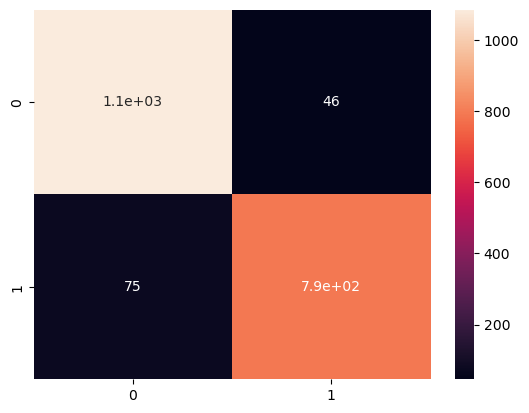

In [2254]:
sns.heatmap(confusion_matrix(y_test,rc.predict(x_test)),annot=True)